In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv("NHoodNameCentroids.csv")

In [3]:
data.head()

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx
3,POINT (-73.90564259591689 40.895437426903875),4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx
4,POINT (-73.91258546108577 40.89083449389134),5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx


In [4]:
data['latitude'] = '0'
data['longitude'] = '0'
data.dtypes

the_geom     object
OBJECTID      int64
Name         object
Stacked       int64
AnnoLine1    object
AnnoLine2    object
AnnoLine3    object
AnnoAngle     int64
Borough      object
latitude     object
longitude    object
dtype: object

In [5]:
for index, row in data.iterrows():
    lat_long = re.search('POINT \((.+?)\)',  row['the_geom'])
    if lat_long:
        data['latitude'][index] = lat_long.group(1).split(' ')[1]
        data['longitude'][index] = lat_long.group(1).split(' ')[0]
data.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough,latitude,longitude
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx,40.89470517661004,-73.8472005205491
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx,40.87429419303015,-73.82993910812405
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx,40.88755567735082,-73.82780644716419
3,POINT (-73.90564259591689 40.895437426903875),4,Fieldston,1,Fieldston,NaN,NaN,0,Bronx,40.895437426903875,-73.90564259591689
4,POINT (-73.91258546108577 40.89083449389134),5,Riverdale,1,Riverdale,NaN,NaN,0,Bronx,40.89083449389134,-73.91258546108577


In [6]:
manhattan_data = data[data['Borough'] == 'Manhattan'].reset_index(drop=True)
drop_columns = ['the_geom', 'OBJECTID', 'Stacked', 'AnnoLine1', 'AnnoLine2', 'AnnoLine3', 'AnnoAngle']
for col in drop_columns:
    del manhattan_data[col]

In [7]:
manhattan_data.head()

,Name,Borough,latitude,longitude
0,Marble Hill,Manhattan,40.87655077879968,-73.91065965862988
1,Chinatown,Manhattan,40.715618422314364,-73.99427936255985
2,Washington Heights,Manhattan,40.85190252555309,-73.93690027985242
3,Inwood,Manhattan,40.86768396449919,-73.92121042203905
4,Hamilton Heights,Manhattan,40.82360428481197,-73.94968791883373


In [8]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [31]:
from geopy.geocoders import Nominatim

In [32]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [33]:
CLIENT_ID = 'C1UYVLF4RL5AWWT22ISOZIFGKGELWO3MKB345KNQVCAPKYX3'
CLIENT_SECRET = 'HPP5M3BSQE3DGNEPI4HHIK5LHNWAV0FIW23ZMDQWBTBM5M0H'
LIMIT = 10000
RADIUS = 500
VERSION = '20180605'

In [14]:
import requests

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Name'],
                                   latitudes=manhattan_data['latitude'],
                                   longitudes=manhattan_data['longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron


In [36]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.87655077879968,-73.91065965862988,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.87655077879968,-73.91065965862988,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.87655077879968,-73.91065965862988,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.87655077879968,-73.91065965862988,Dunkin',40.877136,-73.906666,Donut Shop


In [38]:
# Examiing the venue category 
venue_categories = list(set(manhattan_venues['Venue Category']))
print(venue_categories)

['Pet Café', 'Auditorium', 'Plaza', 'Lingerie Store', 'College Theater', 'Steakhouse', 'Toy / Game Store', 'French Restaurant', 'Swiss Restaurant', 'Hobby Shop', 'Used Bookstore', 'Gym / Fitness Center', 'South American Restaurant', 'Cooking School', 'Gastropub', 'Resort', 'Peruvian Restaurant', 'Tourist Information Center', 'Himalayan Restaurant', 'Furniture / Home Store', 'Poke Place', 'Skating Rink', 'Leather Goods Store', 'Mattress Store', 'Ice Cream Shop', 'Tree', 'Gym', 'Supermarket', 'American Restaurant', 'Electronics Store', 'Donut Shop', 'Pharmacy', 'Bookstore', 'Farmers Market', 'Ski Shop', 'Candy Store', 'Pet Store', 'Baby Store', 'Breakfast Spot', 'Camera Store', 'Music School', 'Cultural Center', 'Seafood Restaurant', 'Southern / Soul Food Restaurant', 'Tattoo Parlor', 'Christmas Market', 'South Indian Restaurant', 'Miscellaneous Shop', 'Gourmet Shop', 'Grocery Store', 'Rock Club', 'Pool', 'Boat or Ferry', 'Fast Food Restaurant', 'Department Store', 'Brazilian Restaurant'

In [39]:
sample_categories = ['school', 'college', 'university', 'tea', 'coffee', 'office', 'center', 'cafeteria', 'café', 'center', 'academic', 'services']
filtered_categories = []
for venue in venue_categories:
    venue_lower = venue.lower()
    for sample_venue in sample_categories:
        if sample_venue in venue_lower:
            filtered_categories.append(venue)
print(filtered_categories)

['Pet Café', 'College Theater', 'Steakhouse', 'Gym / Fitness Center', 'Gym / Fitness Center', 'Cooking School', 'Tourist Information Center', 'Tourist Information Center', 'Music School', 'Cultural Center', 'Cultural Center', 'Community Center', 'Community Center', 'Weight Loss Center', 'Weight Loss Center', 'Café', 'Tea Room', 'School', 'College Academic Building', 'College Academic Building', 'Cafeteria', 'Garden Center', 'Garden Center', 'Bubble Tea Shop', 'Coffee Shop', 'High School', 'College Bookstore', 'Recreation Center', 'Recreation Center', 'Paper / Office Supplies Store', "Doctor's Office", 'College Arts Building', 'Office', 'College Cafeteria', 'College Cafeteria', 'Medical Center', 'Medical Center', 'Spiritual Center', 'Spiritual Center']


In [40]:
#Filerring out the relevant categories
relevant_categories = ['Pet Café', 'College Theater', 'Gym / Fitness Center', 'Gym / Fitness Center', 
                       'Cooking School', 'Tourist Information Center', 'Tourist Information Center', 'Music School', 
                       'Cultural Center', 'Cultural Center', 'Community Center', 'Community Center', 
                       'Weight Loss Center', 'Weight Loss Center', 'Café', 'Tea Room', 'School', 
                       'College Academic Building', 'College Academic Building', 'Cafeteria', 'Garden Center', 
                       'Garden Center', 'Bubble Tea Shop', 'Coffee Shop', 'High School', 'College Bookstore', 
                       'Recreation Center', 'Recreation Center', 'Paper / Office Supplies Store', 
                       "Doctor's Office", 'College Arts Building', 'Office', 'College Cafeteria', 
                       'College Cafeteria', 'Medical Center', 
                       'Medical Center', 'Spiritual Center', 'Spiritual Center' ]

In [41]:
manhattan_venues = manhattan_venues[manhattan_venues['Venue Category'].isin(relevant_categories)]

In [42]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.877531,-73.905582,Coffee Shop
10,Marble Hill,40.87655077879968,-73.91065965862988,Starbucks,40.873755,-73.908613,Coffee Shop
44,Chinatown,40.715618422314364,-73.99427936255985,The Sill,40.716245,-73.992027,Garden Center
45,Chinatown,40.715618422314364,-73.99427936255985,Yaya Tea Garden,40.716177,-73.994902,Tea Room
48,Chinatown,40.715618422314364,-73.99427936255985,Teado,40.717184,-73.994883,Bubble Tea Shop


In [44]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Bubble Tea Shop,Cafeteria,Café,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,...,Music School,Office,Paper / Office Supplies Store,Pet Café,Recreation Center,School,Spiritual Center,Tea Room,Tourist Information Center,Weight Loss Center
3,Marble Hill,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Marble Hill,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48,Chinatown,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').sum().reset_index()
manhattan_grouped

,Neighborhood,Bubble Tea Shop,Cafeteria,Café,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,...,Music School,Office,Paper / Office Supplies Store,Pet Café,Recreation Center,School,Spiritual Center,Tea Room,Tourist Information Center,Weight Loss Center
0,Battery Park City,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Carnegie Hill,0,0,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Harlem,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,1,6,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Chinatown,2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,Civic Center,1,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Clinton,0,0,1,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,East Harlem,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,East Village,0,0,1,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Financial District,0,0,2,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
manhattan_grouped['Customers'] = 0
manhattan_grouped['Competitors'] = 0
Customers =[ 'College Theater', 'Gym / Fitness Center', 'Gym / Fitness Center', 
                       'Cooking School', 'Tourist Information Center', 'Tourist Information Center', 'Music School', 
                       'Cultural Center', 'Cultural Center', 'Community Center', 'Community Center', 
                       'Weight Loss Center', 'Weight Loss Center', 'School', 
                       'College Academic Building', 'College Academic Building','Garden Center', 
                       'Garden Center','High School', 'College Bookstore', 
                       'Recreation Center', 'Recreation Center', 'Paper / Office Supplies Store', 
                       "Doctor's Office", 'College Arts Building', 'Office', 'Medical Center', 
                       'Medical Center', 'Spiritual Center', 'Spiritual Center' ]
for customer in Customers:
    manhattan_grouped['Customers'] = manhattan_grouped['Customers'] + manhattan_grouped[customer]
Competitors = ['Café', 'Tea Room', 'Cafeteria', 'Bubble Tea Shop', 'Coffee Shop', 'College Cafeteria', 
                       'College Cafeteria']
for competitor in Competitors:
    manhattan_grouped['Competitors'] = manhattan_grouped['Competitors'] + manhattan_grouped[competitor]

In [93]:
import matplotlib.pyplot as plt;

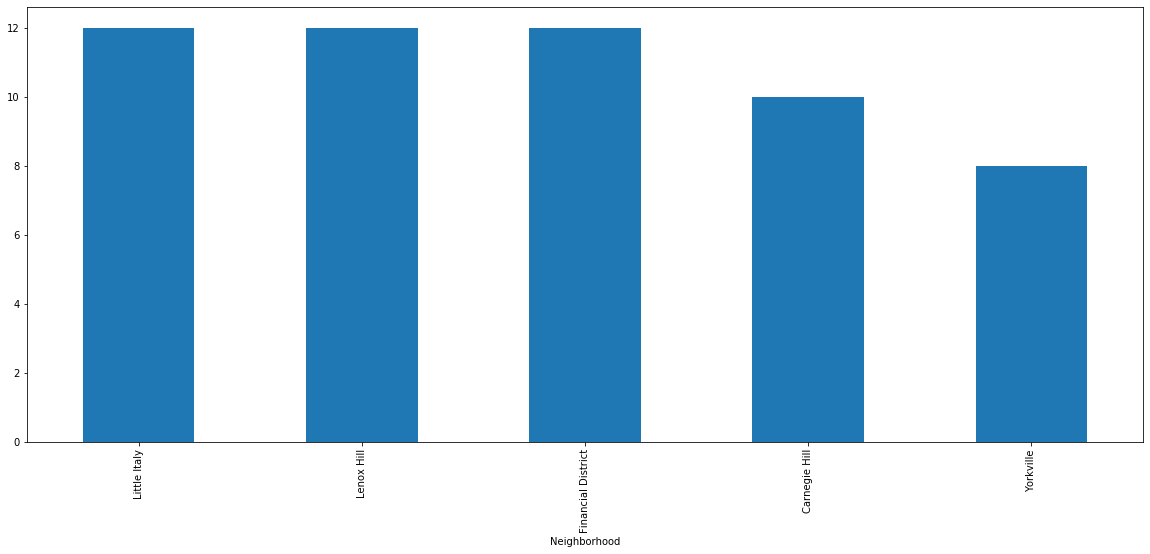

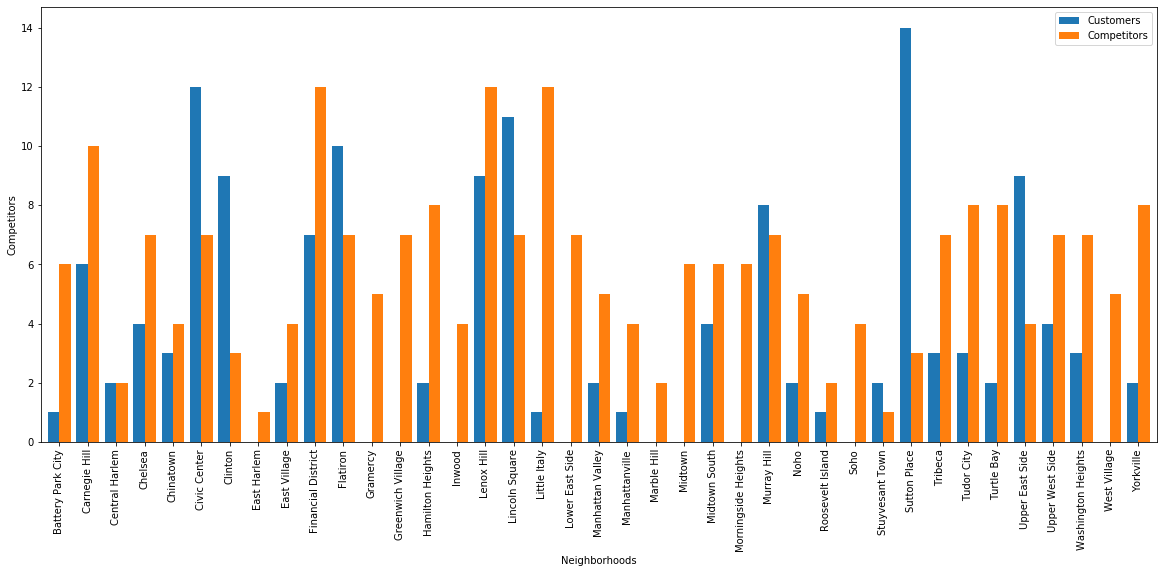

In [110]:
df = manhattan_grouped[['Neighborhood', 'Customers', 'Competitors']].copy()
df.set_index("Neighborhood",drop=True,inplace=True)
df.sort_values(by=['Competitors'], ascending=False)[:5]['Competitors'].plot(kind='bar', figsize=(20, 8))
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, edgecolor="none")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Competitors")
plt.show()

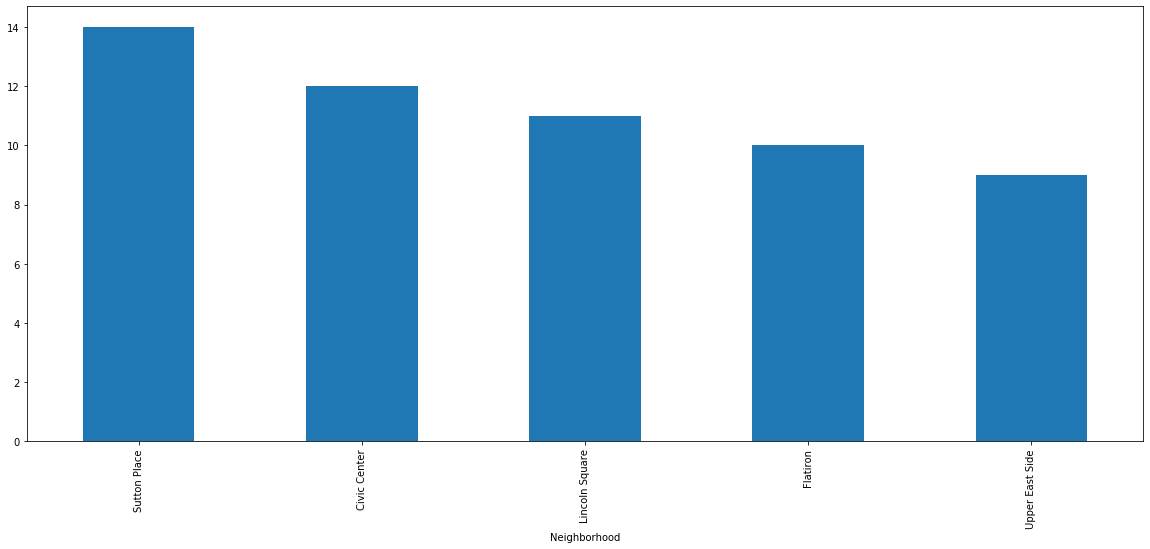

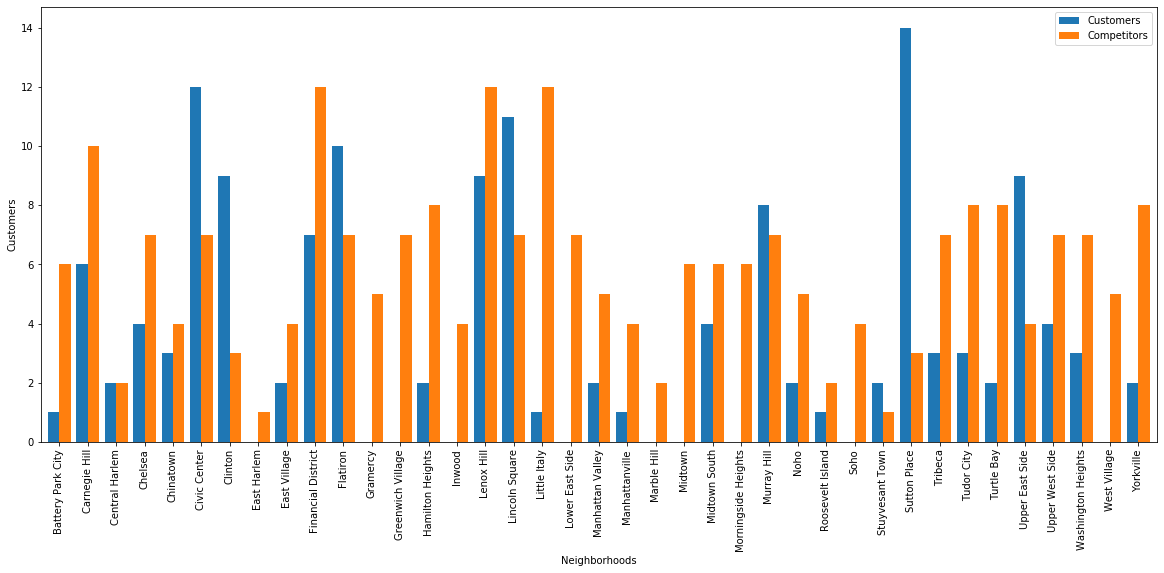

In [111]:
df.sort_values(by=['Customers'], ascending=False)[:5]['Customers'].plot(kind='bar', figsize=(20, 8))
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, edgecolor="none")
ax.set_xlabel("Neighborhoods")
ax.set_ylabel("Customers")
plt.show()